In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import os

import pandas as pd

# Samples

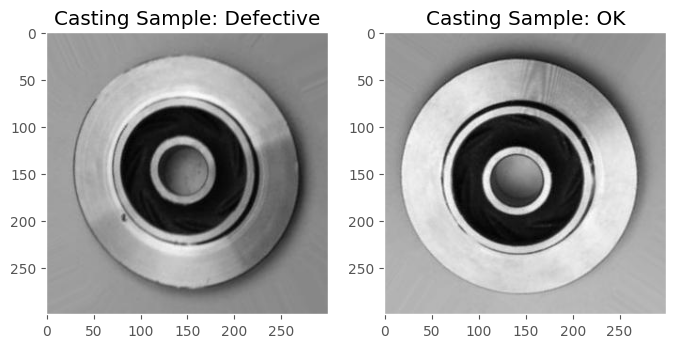

In [4]:
dir_data = './data/'
dir_data_train = dir_data + 'train/'
dir_data_val = dir_data + 'val/'
dir_data_test = dir_data + 'test/'

# Plot samples of defective and non-defective casting
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sample_def = plt.imread(os.path.join(dir_data_train, "defective", "cast_def_0001.jpeg"))
sample_ok = plt.imread(os.path.join(dir_data_train, "ok", "cast_ok_0001.jpeg"))
axes[0].imshow(sample_def)
axes[1].imshow(sample_ok)
axes[0].set_title('Casting Sample: Defective', loc='center')
axes[1].set_title('Casting Sample: OK', loc='center')
axes[0].grid(False)
axes[1].grid(False)
plt.show()

# Class distributions 

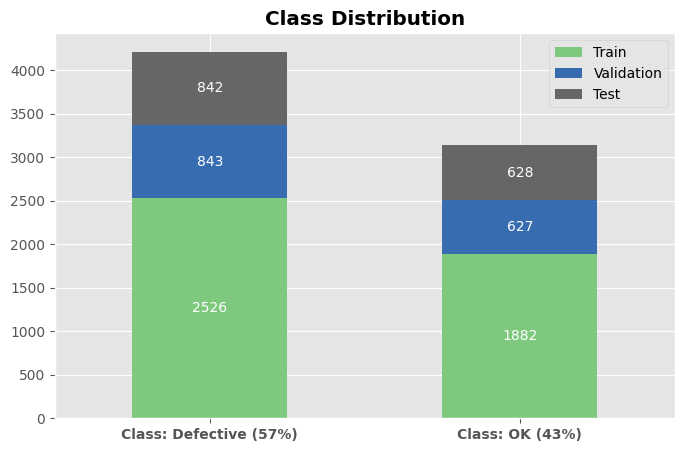

In [6]:
n_train = [len(os.listdir(dir_data_train + "defective/")), len(os.listdir(dir_data_train + "ok/"))]
n_val = [len(os.listdir(dir_data_val + "defective/")), len(os.listdir(dir_data_val + "ok/"))]
n_test = [len(os.listdir(dir_data_test + "defective/")), len(os.listdir(dir_data_test + "ok/"))]

dist_df = pd.DataFrame(
    data=[n_train, n_val, n_test],
    columns=['Defective', 'OK'],
    index=['Train', "Validation", 'Test'])

# Visualize class distribution
ax = dist_df.T.plot(kind= 'bar', stacked= True, rot= 0, figsize= (8,5), colormap= 'Accent')
ax.set_title('Class Distribution', loc= 'center', weight= 'bold')
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() - 0.25,
            bar.get_y() + bar.get_height()/2,
            int(bar.get_height()),
            ha= 'center', va= 'center', color= 'white')
pct_def = 100 * dist_df['Defective'].values.sum() / dist_df.values.sum()
pct_ok = 100 - pct_def
ax.set_xticklabels([f'Class: Defective ({pct_def:.0f}%)',
                    f'Class: OK ({pct_ok:.0f}%)'], weight='bold')
plt.show()